# Iris Logistic Regression Implementation

The modified Iris flower data set consists of 50 samples from each of two species of Iris (Iris setosa and Iris versicolor) for binary classification. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. *In week 4 you will apply a Neural Network to the full Iris dataset for multiway classification*.

Your task is to design, fit and evaluate a Logistic Regression model to clasify the each species.

| Binary | Class |
| --- | --- |
| 0 | versicolor |
| 1 | setosa |

#### Step 1 - Import Dependencies

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [2]:
#Import data as a Pandas DataFrame
iris = pd.read_csv('data/iris_modified.csv', sep='\t')
iris = pd.DataFrame({
    'sepal_length': iris['sepal_length'],
    'sepal_width': iris['sepal_width'],
    'petal_length': iris['petal_length'],
    'petal_width': iris['petal_width'],
    'species': iris['species'],
})

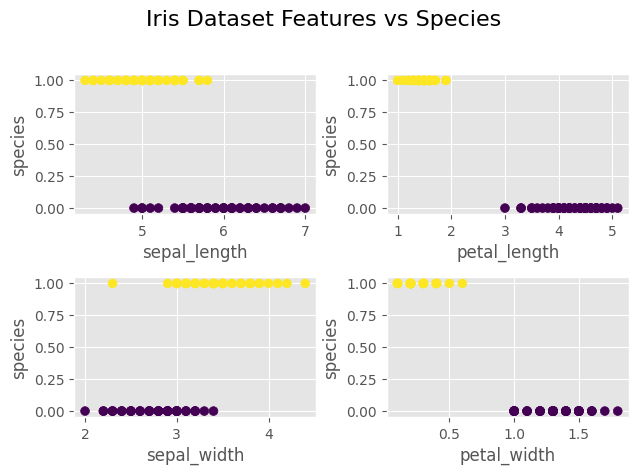

In [3]:
# Plot the data
fig,ax = plt.subplots(2,2)
ax[0,0].scatter(iris.sepal_length, iris.species, s=40, c=iris['species'])
ax[0,0].set_xlabel("sepal_length")
ax[0,0].set_ylabel("species")

ax[1,0].scatter(iris.sepal_width, iris.species, s=40, c=iris['species'])
ax[1,0].set_xlabel("sepal_width")
ax[1,0].set_ylabel("species")

ax[0,1].scatter(iris.petal_length, iris.species, s=40, c=iris['species'])
ax[0,1].set_xlabel("petal_length")
ax[0,1].set_ylabel("species")

ax[1,1].scatter(iris.petal_width, iris.species, s=40, c=iris['species'])
ax[1,1].set_xlabel("petal_width")
ax[1,1].set_ylabel("species")
fig.suptitle("Iris Dataset Features vs Species", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title and labels
plt.show()

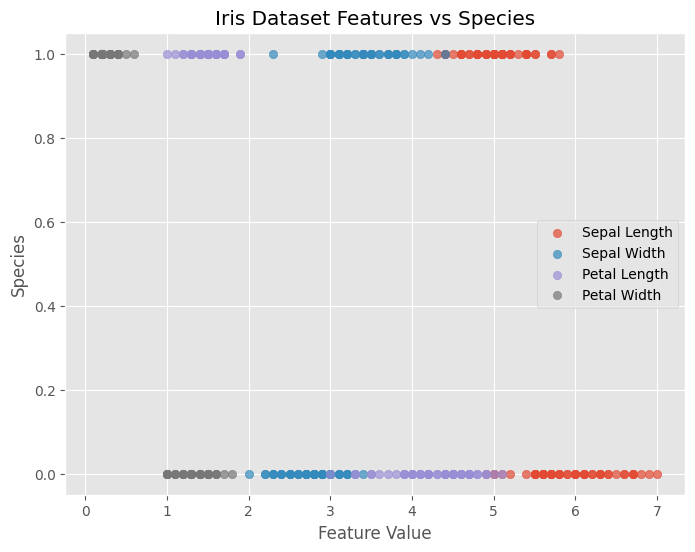

In [4]:
#Alternative plotting as a single plot:
plt.figure(figsize=(8, 6))

# Scatter plots for each feature
plt.scatter(iris.sepal_length, iris.species, label="Sepal Length", alpha=0.7)
plt.scatter(iris.sepal_width, iris.species, label="Sepal Width", alpha=0.7)
plt.scatter(iris.petal_length, iris.species, label="Petal Length", alpha=0.7)
plt.scatter(iris.petal_width, iris.species, label="Petal Width", alpha=0.7)

# Add labels and legend
plt.xlabel("Feature Value")
plt.ylabel("Species")
plt.title("Iris Dataset Features vs Species")
plt.legend()
plt.show()

In [5]:
# Store the strongest features and target categories

# Features variable
X_iris = iris[['petal_length', 'petal_width']]
# Target variable
y_iris = iris['species']

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


#### Step 3: Instantiate a LogisticRegression Object

In [6]:
iris_regression = LogisticRegression()

#### Step 4: Fit the model

In [7]:
iris_regression.fit(X_iris, y_iris)

LogisticRegression()

Now that the regression has been fit, we can use the `predict` method to forecast whether our model thinks a family will switch wells.

In [8]:
# Predict the target for the whole dataset
iris_predictions = iris_regression.predict(X_iris)


Additionally (and in many cases more usefully), the `LogisticRegression` has a `predict_proba` method that produces a predicted **probability**.

In [9]:
#Predict the probabilities for the whole dataset
iris_probabilities = iris_regression.predict_proba(X_iris)
# Print the predicted probabilities
print(iris_probabilities)

[[1.83319308e-02 9.81668069e-01]
 [1.83319308e-02 9.81668069e-01]
 [1.42196878e-02 9.85780312e-01]
 [2.36049315e-02 9.76395069e-01]
 [1.83319308e-02 9.81668069e-01]
 [4.78073210e-02 9.52192679e-01]
 [2.03643570e-02 9.79635643e-01]
 [2.36049315e-02 9.76395069e-01]
 [1.83319308e-02 9.81668069e-01]
 [2.12561034e-02 9.78743897e-01]
 [2.36049315e-02 9.76395069e-01]
 [3.03477703e-02 9.69652230e-01]
 [1.64989308e-02 9.83501069e-01]
 [7.67246895e-03 9.92327531e-01]
 [1.10195537e-02 9.88980446e-01]
 [2.90859408e-02 9.70914059e-01]
 [1.75606597e-02 9.82439340e-01]
 [2.03643570e-02 9.79635643e-01]
 [4.31566602e-02 9.56843340e-01]
 [2.62063587e-02 9.73793641e-01]
 [3.89399108e-02 9.61060089e-01]
 [2.90859408e-02 9.70914059e-01]
 [6.60436858e-03 9.93395631e-01]
 [5.29314238e-02 9.47068576e-01]
 [6.35884743e-02 9.36411526e-01]
 [3.03477703e-02 9.69652230e-01]
 [3.73345841e-02 9.62665416e-01]
 [2.36049315e-02 9.76395069e-01]
 [1.83319308e-02 9.81668069e-01]
 [3.03477703e-02 9.69652230e-01]
 [3.034777

#### Step 5: Plot the Predictions

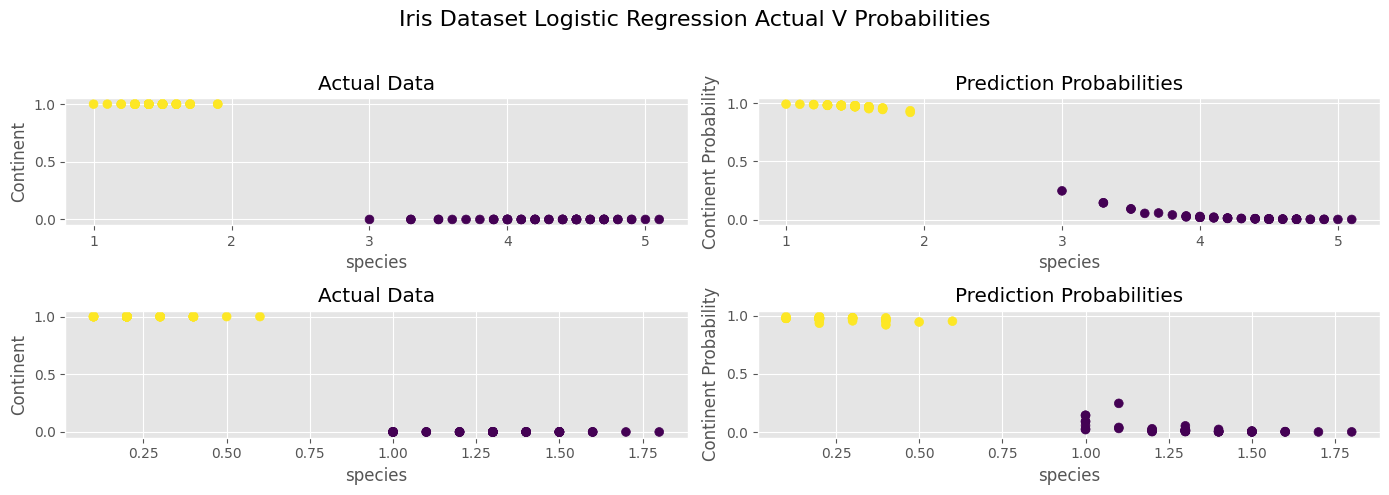

In [10]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(2, 2, figsize=(14, 5))

axs[0,0].scatter(iris.petal_length, iris.species, s=40, c=iris['species'])
axs[0,0].set_title("Actual Data")
axs[0,0].set_xlabel("species")
axs[0,0].set_ylabel("Continent")

axs[0,1].scatter(iris.petal_length, iris_probabilities[:, 1], s=40, c=iris['species'])
axs[0,1].set_title("Prediction Probabilities")
axs[0,1].set_xlabel("species")
axs[0,1].set_ylabel("Continent Probability")

axs[1,0].scatter(iris.petal_width, iris.species, s=40, c=iris['species'])
axs[1,0].set_title("Actual Data")
axs[1,0].set_xlabel("species")
axs[1,0].set_ylabel("Continent")

axs[1,1].scatter(iris.petal_width, iris_probabilities[:, 1], s=40, c=iris['species'])
axs[1,1].set_title("Prediction Probabilities")
axs[1,1].set_xlabel("species")
axs[1,1].set_ylabel("Continent Probability")
fig.suptitle("Iris Dataset Logistic Regression Actual V Probabilities", fontsize=16)  # Add a title to the entire figure
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make space for the title and labels
plt.show()


#### Step 6: Evaluate The Model

In [11]:
mae = mean_absolute_error(y_true=y_iris,y_pred=iris_probabilities[:, 1]) 
mse = mean_squared_error(y_true=y_iris,y_pred=iris_probabilities[:, 1])
print("MAE:",mae) 
print("MSE:",mse) 
print()

#Calculate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_iris,
    'Predicted result': iris_probabilities[:, 1],
    'Loss': abs(y_iris - iris_regression.predict(X_iris).round(2))
})
model_loss["Predicted result"] = model_loss["Predicted result"].round(0)
model_loss["Loss"] = model_loss["Loss"].abs()
model_cost = (1/model_loss.shape[0]) * (model_loss['Loss'].sum() / model_loss.shape[0])

print(f"The cost of this model is  {model_cost:.5f}")
print(f"The model predicted incorrectly {model_loss['Loss'].sum()} times out of {model_loss.shape[0]} predictions")
print(model_loss)

MAE: 0.025314211408281318
MSE: 0.0017445913252995765

The cost of this model is  0.00000
The model predicted incorrectly 0 times out of 100 predictions
    Target  Predicted result  Loss
0        1               1.0     0
1        1               1.0     0
2        1               1.0     0
3        1               1.0     0
4        1               1.0     0
..     ...               ...   ...
95       0               0.0     0
96       0               0.0     0
97       0               0.0     0
98       0               0.0     0
99       0               0.0     0

[100 rows x 3 columns]
